In [0]:
import pandas as pd
import numpy as np

In [0]:
df = pd.read_csv('pf_sentiment.csv')

In [38]:
df.head()

Unnamed: 0  product_parent  ...  helpful_rating  sentiment
0           0       932874238  ...             1.0  -0.010000
1           1       428946394  ...             1.0   0.100000
2           2       904214640  ...             1.0  -0.126667
3           3       984531370  ...             1.0   0.283333
4           4       858196820  ...             1.0   0.246429

[5 rows x 9 columns]

# 归一化

In [39]:
# 归一化star_rating

min = df['star_rating'].min()
max = df['star_rating'].max()

df['star_rating'] = (df['star_rating']-min)/(max-min)

df.head()

Unnamed: 0  product_parent  ...  helpful_rating  sentiment
0           0       932874238  ...             1.0  -0.010000
1           1       428946394  ...             1.0   0.100000
2           2       904214640  ...             1.0  -0.126667
3           3       984531370  ...             1.0   0.283333
4           4       858196820  ...             1.0   0.246429

[5 rows x 9 columns]

In [40]:
# 归一化helpful_rating

min = df['helpful_rating'].min()
max = df['helpful_rating'].max()

df['helpful_rating'] = (df['helpful_rating']-min)/(max-min)
df.head()

Unnamed: 0  product_parent  ...  helpful_rating  sentiment
0           0       932874238  ...             0.0  -0.010000
1           1       428946394  ...             0.0   0.100000
2           2       904214640  ...             0.0  -0.126667
3           3       984531370  ...             0.0   0.283333
4           4       858196820  ...             0.0   0.246429

[5 rows x 9 columns]

In [0]:
# 归一化sentiment
# 实际上应该用正向指标和负向指标共同做。但由于此处df['sentiment']∈[-1,1]，故使用了绝对值进行运算
df['sentiment'] = df['sentiment'].abs()

# 计算权重

In [0]:
k = 1/np.log(df.shape[0])

In [0]:
# 计算star_rating的权重
pstar = df['star_rating']/df['star_rating'].sum() 
estar = -k*(pstar/np.log(pstar)).sum()
dstar = 1-estar

In [0]:
# 计算vine的权重
pvine = df['vine']/df['vine'].sum()
evine = -k*(pvine/np.log(pvine)).sum()
dvine = 1-evine

In [0]:
# 计算verified_purchase的权重
pverified_purchase = df['verified_purchase']/df['verified_purchase'].sum()
everified_purchase = -k*(pverified_purchase/np.log(pverified_purchase)).sum()
dverified_purchase = 1-everified_purchase

In [0]:
# 计算helpful_rating的权重
phelpful_rating = df['helpful_rating']/df['helpful_rating'].sum()
ehelpful_rating = -k*(phelpful_rating/np.log(phelpful_rating)).sum()
dhelpful_rating = 1-ehelpful_rating

In [0]:
# 计算sentiment的权重
psentiment = df['sentiment']/df['sentiment'].sum()
esentiment = -k*(psentiment/np.log(psentiment)).sum()
dsentiment = 1-esentiment

# 计算各项指标的权重

In [48]:
w = dstar+dvine+dverified_purchase+dhelpful_rating+dsentiment
wstar = dstar/w
wvine = dvine/w
wverified_purchase = dverified_purchase/w
whelpful_rating = dhelpful_rating/w
wsentiment = dsentiment/w
print(wstar, wvine, wverified_purchase, whelpful_rating, wsentiment)

0.20043437464524322 0.19833991831425474 0.20042428196592127 0.2004240158932718 0.20037740918130903


# 计算各样本的综合得分

In [0]:
df['value_score'] = df['star_rating']*wstar + df['vine']*wvine + df['verified_purchase']*wverified_purchase + df['helpful_rating']*whelpful_rating + df['sentiment']*wsentiment

In [50]:
df

Unnamed: 0  product_parent  ...  sentiment  value_score
0               0       932874238  ...   0.010000     0.002004
1               1       428946394  ...   0.100000     0.220462
2               2       904214640  ...   0.126667     0.025381
3               3       984531370  ...   0.283333     0.407524
4               4       858196820  ...   0.246429     0.249803
...           ...             ...  ...        ...          ...
18932       18932        51313971  ...   0.251860     0.250894
18933       18933        51313971  ...   0.313194     0.413507
18934       18934        51313971  ...   0.466667     0.494368
18935       18935        51313971  ...   0.046261     0.159588
18936       18936        51313971  ...   0.017969     0.254133

[18937 rows x 10 columns]

(array([   7.,    7.,   13.,   11.,   12.,   31.,   15.,   46.,   65.,
          29.,  150.,   95.,  165.,  169.,  119.,  229.,  181.,  333.,
         382.,  356.,  829.,  555.,  796.,  664.,  513.,  984.,  848.,
        1267., 1138., 1399., 1842., 1390., 1379.,  959.,  650.,  534.,
         233.,  349.,   75.,  118.]),
 array([0.        , 0.0200415 , 0.040083  , 0.06012451, 0.08016601,
        0.10020751, 0.12024901, 0.14029051, 0.16033202, 0.18037352,
        0.20041502, 0.22045652, 0.24049802, 0.26053953, 0.28058103,
        0.30062253, 0.32066403, 0.34070553, 0.36074704, 0.38078854,
        0.40083004, 0.42087154, 0.44091304, 0.46095455, 0.48099605,
        0.50103755, 0.52107905, 0.54112056, 0.56116206, 0.58120356,
        0.60124506, 0.62128656, 0.64132807, 0.66136957, 0.68141107,
        0.70145257, 0.72149407, 0.74153558, 0.76157708, 0.78161858,
        0.80166008]),
 <a list of 40 Patch objects>)

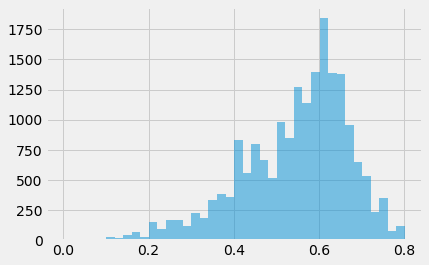

In [51]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

plt.hist(df['value_score'], normed=False, alpha=0.5, bins=40)

In [0]:
# raw = pd.read_csv('pf_sentiment.csv')
# raw['value_score'] = df['value_score']
# raw.to_csv('pf_value.csv',index=None,index_label=False)